<a href="https://colab.research.google.com/github/alyson-mei/ml_stuff/blob/main/practice/week06_gym_interfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Practice: gym interfaces

_Reference: based on Practical RL_ [week01](https://github.com/yandexdataschool/Practical_RL/tree/master/week01_intro)

In [ ]:
# In Google Colab, uncomment this:
!wget https://bit.ly/2FMJP5K -O setup.py && bash setup.py

# This code creates a virtual display to draw game images on.
# If you are running locally, just ignore it

--2025-01-05 12:51:59--  https://bit.ly/2FMJP5K
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/yandexdataschool/Practical_RL/spring19/setup_colab.sh [following]
--2025-01-05 12:51:59--  https://raw.githubusercontent.com/yandexdataschool/Practical_RL/spring19/setup_colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262 [text/plain]
Saving to: ‘setup.py’

setup.py            100%[===================>]     262  --.-KB/s    in 0s      

2025-01-05 12:51:59 (8.62 MB/s) - ‘setup.py’ saved [262/262]



In [ ]:
!pip install gym[box2d]
!pip install pyglet

1
  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Using cached pygame-2.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.5 kB)
  Using cached swig-4.3.0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (3.5 kB)
Using cached pygame-2.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached swig-4.3.0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.9 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (box2d-py)


### OpenAI Gym

We're gonna spend several next weeks learning algorithms that solve decision processes. We are then in need of some interesting decision problems to test our algorithms.

That's where OpenAI gym comes into play. It's a python library that wraps many classical decision problems including robot control, videogames and board games.

So here's how it works:

In [ ]:
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    %env DISPLAY = : 1


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


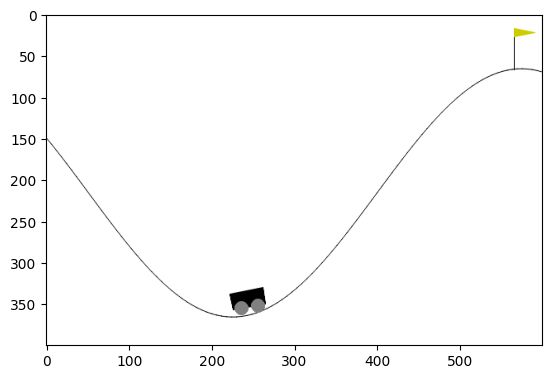

In [ ]:
import gym

env = gym.make("MountainCar-v0")
env.reset()

plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

In [ ]:
gym.__version__

'0.25.2'

Note: if you're running this on your local machine, you'll see a window pop up with the image above. Don't close it, just alt-tab away.

### Gym interface

The three main methods of an environment are
* __reset()__ - reset environment to initial state, _return first observation_
* __render()__ - show current environment state (a more colorful version :) )
* __step(a)__ - commit action __a__ and return (new observation, reward, is done, info)
 * _new observation_ - an observation right after commiting the action __a__
 * _reward_ - a number representing your reward for commiting action __a__
 * _is done_ - True if the MDP has just finished, False if still in progress
 * _info_ - some auxilary stuff about what just happened. Ignore it ~~for now~~.

In [ ]:
obs0 = env.reset()
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity

initial observation code: [-0.53748226  0.        ]


In [ ]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# Note: as you can see, the car has moved to the right slightly (around 0.0005)

taking action 2 (right)
new observation code: [-0.53637815  0.0011041 ]
reward: -1.0
is game over?: False


### Play with it

Below is the code that drives the car to the right.

However, it doesn't reach the flag at the far right due to gravity.

__Your task__ is to fix it. Find a strategy that reaches the flag.

You're not required to build any sophisticated algorithms for now, feel free to hard-code :)

__Hint__: your action at each step should depend either on `t` or on `s`.

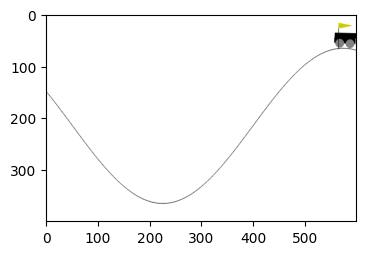

In [ ]:
from IPython import display
import time
#plt.draw_idle()


# create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(
    gym.envs.classic_control.MountainCarEnv(),
    max_episode_steps=TIME_LIMIT + 1,
)
s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

plt.figure(figsize=(4, 3))
display.clear_output(wait=True)
choice = 'right'
for t in range(TIME_LIMIT):
    plt.gca().clear()

    # change the line below to reach the flag
    if s[1] >= 0:
        a = actions["right"]
    else:
        a = actions["left"]

    s, r, is_done, _ = env.step(a)

    # draw game image on display
    plt.imshow(env.render('rgb_array'))

    display.clear_output(wait=True)
    display.display(plt.gcf())

    if is_done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)

In [ ]:
assert s[0] > 0.47
print("You solved it!")

You solved it!
